# **Visualization of the 3X+1 Conjecture**

## **Content**
1. Overview
2. Historic Results
3. Experiements
4. Summary



## **Overview**
One of the most famous unsolved mathematical problems, often called $3X+1$ or Collatz Conjecture, it has troubled mathematicians more than 80 years since first introduced by Lothar Collatz in 1937. In this notebook, we will present some of the bizzare behaviours the $3X+1$ problem exhibit and explain why such conjecture can be so difficult.

However, the purpose of this note is to demonstrate the visualization part of the conjecture, rather than working through rigorous proofs and strict mathematical definitions, or trying to solve it even at a minimum attempt.

The first version of the Collatz function can be defined as:

\begin{equation}
    T(n)=\begin{cases}
      \frac{n}{2} \;\; \text{if} \;\; n \equiv 0 \pmod{2}\\
      3n+1 \;\; \text{if} \;\; n\equiv 1 \pmod{2}
    \end{cases},
\end{equation}

The second version of the Collatz function is slightly different, but only omits some halving steps:
\begin{equation}
    t(n)=\begin{cases}
      \frac{n}{2} \;\; \text{if} \;\; n \equiv 0 \pmod{2}\\
      \frac{3n+1}{2} \;\; \text{if} \;\; n\equiv 1 \pmod{2}
    \end{cases}.
\end{equation}

We will explain the difference and why the second version is necessary in later part. Please note that the usual definition of Collatz function is $T(n)$.

The $k$-th iteration of the Collatz function is often denoted as $T^{(k)}(n)$, then the Collatz sequence or 'trajectory' is $C(n)=\lbrace n, T^{(1)}(n), T^{(2)}(n), T^{(3)}(n), ... , T^{(k)}(n) \rbrace$. The length of trajectory, or 'stopping time', $S(n)$, is defined as the steps the sequence takes to reach 1, if it ever does. For example, $C(3)=\lbrace 3, 10, 5, 16, 8, 4, 2, 1 \rbrace$, and $S(3)=|C(3)|-1=7$.

The Collatz conjecture asserts that:
1. All $S(n)$ is finite for all $n\geq{2}$.
2. The only Collatz cycle is $4-2-1$.

In [ ]:
import numpy as np
import math
from matplotlib.pyplot import step, show
import matplotlib.pyplot as plt
from math import log
import networkx as nx

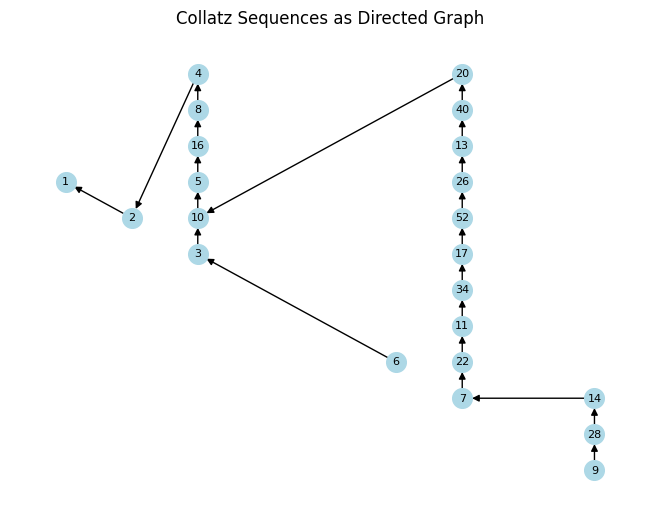

In [ ]:
def collatz(n):
    while n > 1:
        yield n
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
    yield 1
def plot_collatz_graph(branch_length):
    G = nx.DiGraph()
    pos = {}
    level_height = 100
    for i in range(1, branch_length + 1):
        x = i
        y = -i * level_height
        seq = list(collatz(i))
        for j in range(len(seq)):
            if seq[j] not in pos:
                pos[seq[j]] = (x, y)
            y += level_height
    for i in range(1, branch_length + 1):
        seq = list(collatz(i))
        for j in range(len(seq) - 1):
            G.add_edge(seq[j], seq[j + 1])
    nx.draw(G, pos, with_labels=True, node_size=200, font_size=8, node_color='lightblue', arrows=True)
    plt.title("Collatz Sequences as Directed Graph")
    plt.show()
def main():
    branch_length = 11
    plot_collatz_graph(branch_length)
if __name__ == "__main__":
    main()

## **Historic Results**

We see that the trajectory consists of some ascending and descending part, and the iteration itself maps one sequence into another, i.e., $T^{(1)}(3) \rightarrow T(10), $ and therefore $S(10)=S(3)-1$. Now we are going to examine the bigger picture and why they those trajectories are so difficult to analyze.

We begin by showing three similar Collatz trajectories of integer $27$, $31$ and $41$.

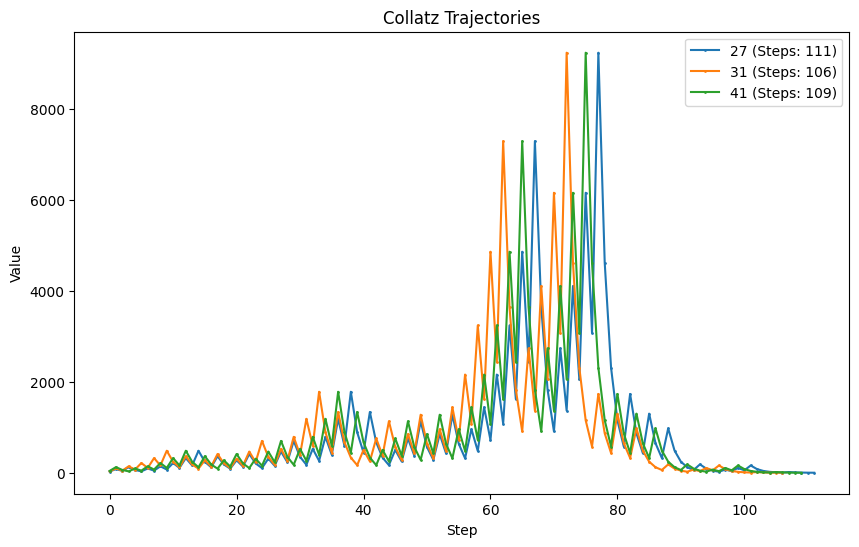

Sequence for 27 (Steps: 111): [27, 82, 41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Sequence for 31 (Steps: 106): [31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 

In [ ]:
def collatz_trajectory(n):
    trajectory = [n]
    steps = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        trajectory.append(n)
        steps += 1
    return trajectory, steps
trajectories = {}
for n in [27, 31, 41]:
    trajectory, steps = collatz_trajectory(n)
    trajectories[n] = (trajectory, steps)
plt.figure(figsize=(10, 6))
for n, (trajectory, steps) in trajectories.items():
    plt.plot(trajectory, marker='o', markersize=1, label=f'{n} (Steps: {steps})')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Collatz Trajectories')
plt.legend()
plt.show()
for n, (trajectory, steps) in trajectories.items():
    print(f"Sequence for {n} (Steps: {steps}): {trajectory}")

Next, we can take a look at more trajectories and their respected stopping time.

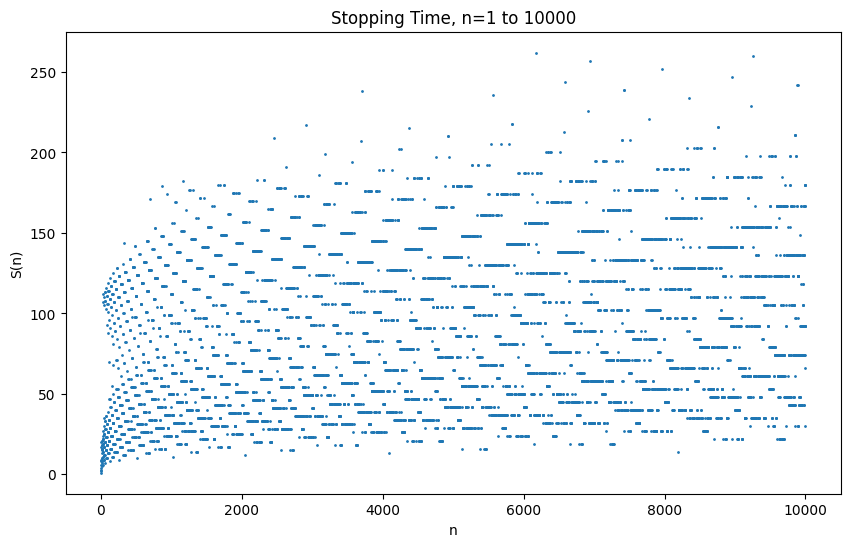

In [ ]:
def collatz_trajectory_length(n):
    length = 1
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        length += 1
    return length
integers = list(range(1, 10001))
lengths = [collatz_trajectory_length(n) for n in integers]
plt.figure(figsize=(10, 6))
plt.plot(integers, lengths, marker='o', markersize=1, linestyle='none')
plt.xlabel('n')
plt.ylabel('S(n)')
plt.title('Stopping Time, n=1 to 10000')
plt.show()

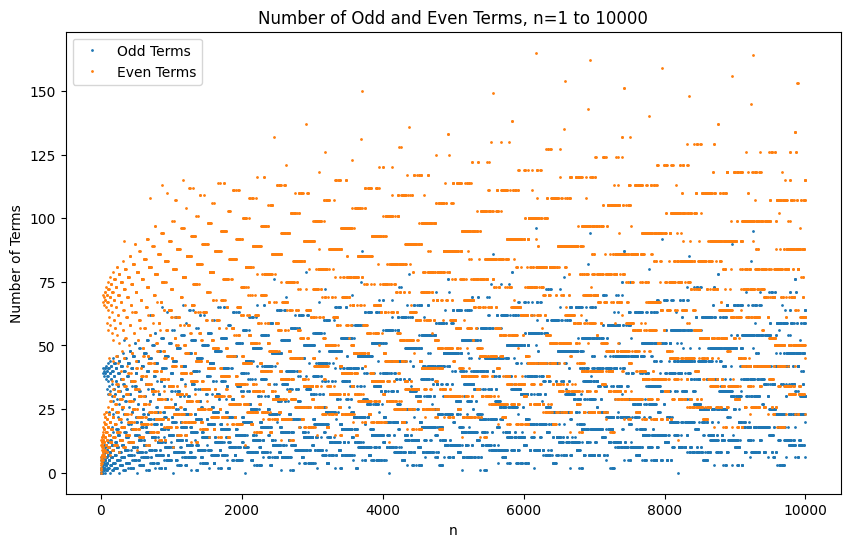

In [ ]:
def collatz_odd_count(n):
    odd_count = 0
    while n != 1:
        if n % 2 == 1:
            odd_count += 1
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
    return odd_count
def collatz_even_count(n):
    even_count = 0
    while n != 1:
        if n % 2 == 0:
            even_count += 1
            n = n // 2
        else:
            n = 3 * n + 1
    return even_count
integers = list(range(1, 10001))
odd_counts = [collatz_odd_count(n) for n in integers]
even_counts = [collatz_even_count(n) for n in integers]
plt.figure(figsize=(10, 6))
plt.plot(integers, odd_counts, marker='o', markersize=1, linestyle='None', label='Odd Terms')
plt.plot(integers, even_counts, marker='o', markersize=1, linestyle='None', label='Even Terms')
plt.xlabel('n')
plt.ylabel('Number of Terms')
plt.title('Number of Odd and Even Terms, n=1 to 10000')
plt.legend()
plt.show()

The distribution of S(n) shows a bimodal pattern.

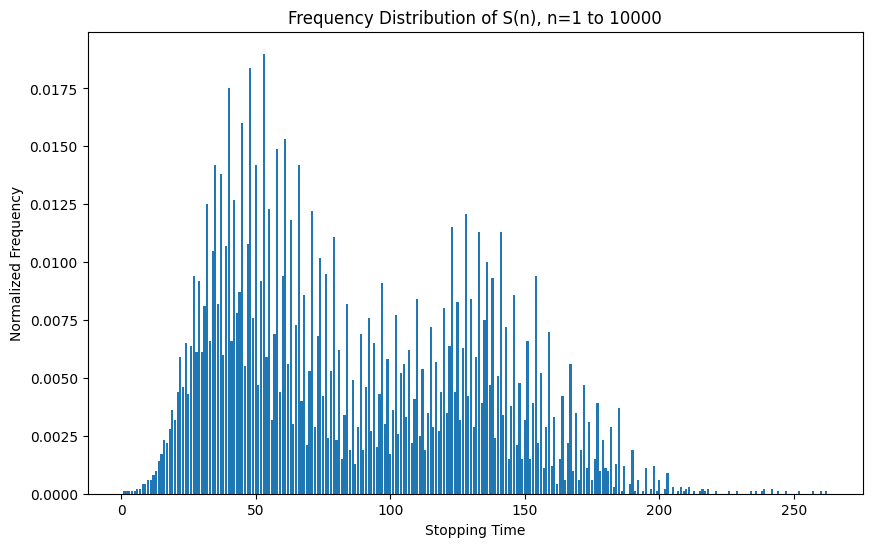

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
def collatz_trajectory_length(n):
    length = 1
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        length += 1
    return length
integers = list(range(1, 10001))
lengths = [collatz_trajectory_length(n) for n in integers]
length_freq = Counter(lengths)
total_integers = len(integers)
normalized_freq = {length: freq / total_integers for length, freq in length_freq.items()}
plt.figure(figsize=(10, 6))
plt.bar(normalized_freq.keys(), normalized_freq.values())
plt.xlabel('Stopping Time')
plt.ylabel('Normalized Frequency')
plt.title('Frequency Distribution of S(n), n=1 to 10000')
plt.show()

## **Experiment**

If we define $E(n)$ as the even terms and $O(n)$ as the odd terms in $C(n)$, then
$$S(n)=|E(n)|+|O(n)|=log_2(6^{|O(n)|}\cdot{n})+log_2(\frac{2^{|E(n)|}}{n\cdot{3^{|O(n)|}}}),$$
where
$$Res(n)=\frac{2^{|E(n)|}}{n\cdot{3^{|O(n)|}}}=\prod_{q\,\in\,{O(n)}}\frac{3q+1}{3q},$$
this error term is called the 'resiude' of the sequence and can be interpreted as a product over all odd terms.
Heuristic studies highly suggests that $\epsilon(993)=\epsilon(993\cdot{2^k})\approx1.25314$ is the upper bound for all Collatz sequences.
<p/>

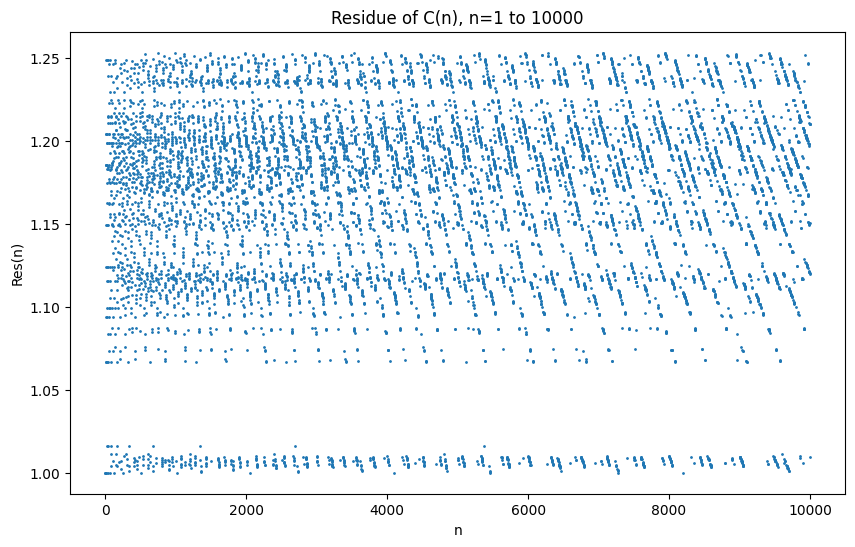

In [ ]:
ratios = [(2**even) / (n * (3**odd)) if odd != 0 else 2**even / n for n, even, odd in zip(integers, even_counts, odd_counts)]
plt.figure(figsize=(10, 6))
plt.plot(integers, ratios, marker='o', markersize=1, linestyle='None')
plt.xlabel('n')
plt.ylabel('Res(n)')
plt.title('Residue of C(n), n=1 to 10000')
plt.show()

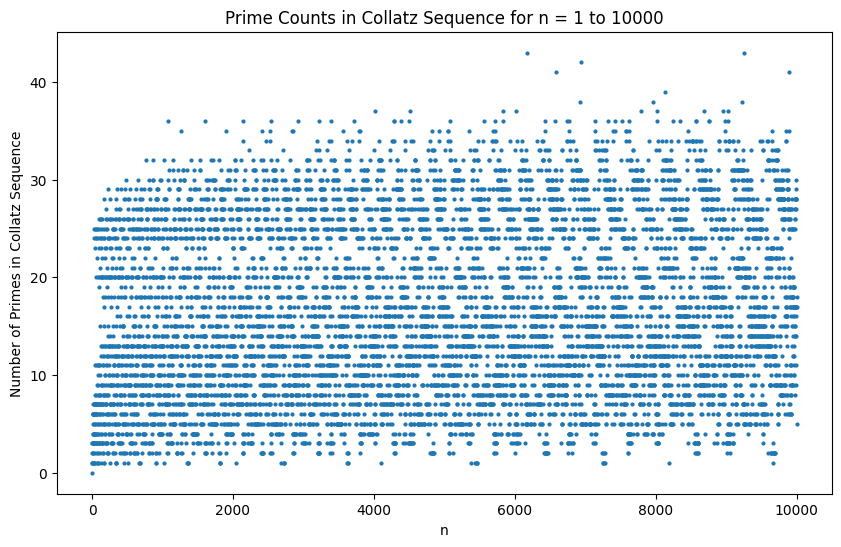

In [ ]:
def is_prime(num):
    if num <= 1:
        return False
    if num <= 3:
        return True
    if num % 2 == 0 or num % 3 == 0:
        return False
    i = 5
    while i * i <= num:
        if num % i == 0 or num % (i + 2) == 0:
            return False
        i += 6
    return True
def collatz_sequence_primes_count(n):
    count = 0
    while n != 1:
        if is_prime(n):
            count += 1
        if n % 2 == 0:
            n //= 2
        else:
            n = 3 * n + 1
    return count
prime_counts_list = [collatz_sequence_primes_count(n) for n in range(1, 10001)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10001), prime_counts_list, linestyle='none', marker='o', markersize=2)
plt.xlabel('n')
plt.ylabel('Number of Primes in Collatz Sequence')
plt.title('Prime Counts in Collatz Sequence, n = 1 to 10000')
plt.show()
